<a href="https://colab.research.google.com/github/mutiaratsani/computer-vision/blob/main/tugas9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import zipfile

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IBYMjlHqVjSdXiOaINTB94N8MyQhn1bY' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1IBYMjlHqVjSdXiOaINTB94N8MyQhn1bY" -O /tmp/dataset.zip && rm -rf /tmp/cookies.txt

--2022-01-26 15:17:02--  https://docs.google.com/uc?export=download&confirm=&id=1IBYMjlHqVjSdXiOaINTB94N8MyQhn1bY
Resolving docs.google.com (docs.google.com)... 64.233.188.138, 64.233.188.139, 64.233.188.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-4o-docs.googleusercontent.com/docs/securesc/8k3nj6slg6dhnkaebl61754qeehilg8t/6o2akonj0td8kqdgdq5ic43u185bku5m/1643210175000/08585088723389417016/09491669568458555951Z/1IBYMjlHqVjSdXiOaINTB94N8MyQhn1bY?e=download [following]
--2022-01-26 15:17:03--  https://doc-10-4o-docs.googleusercontent.com/docs/securesc/8k3nj6slg6dhnkaebl61754qeehilg8t/6o2akonj0td8kqdgdq5ic43u185bku5m/1643210175000/08585088723389417016/09491669568458555951Z/1IBYMjlHqVjSdXiOaINTB94N8MyQhn1bY?e=download
Resolving doc-10-4o-docs.googleusercontent.com (doc-10-4o-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to 

In [3]:
local_zip = '/tmp/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
imagePaths = '/tmp/dataset/'
label_list = ['agapornispersonata', 'agapornistaranta']
data = []
labels = []

In [5]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [6]:
np.array(data).shape

(98, 32, 32, 3)

In [7]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [8]:
print(labels)

['agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonata' 'agapornispersonata'
 'agapornispersonata' 'agapornispersonat

In [9]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [11]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (78, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


In [12]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [14]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [15]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [16]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 124ms/step - loss: 0.7180 - accuracy: 0.4872 - val_loss: 0.6515 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6896 - accuracy: 0.5641 - val_loss: 0.6763 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 43ms/step - loss: 0.6591 - accuracy: 0.5385 - val_loss: 0.6935 - val_accuracy: 0.5500
Epoch 4/100
3/3 [==============================] - 0s 44ms/step - loss: 0.6187 - accuracy: 0.6923 - val_loss: 0.9159 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 42ms/step - loss: 0.6235 - accuracy: 0.6026 - val_loss: 0.7295 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 42ms/step - loss: 0.5884 - accuracy: 0.7308 - val_loss: 0.9755 - val_accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6537 - accuracy: 0.6154 - val_loss: 0.6181 - val_accuracy: 0.8000
Epoch 8/100
3/3 [==

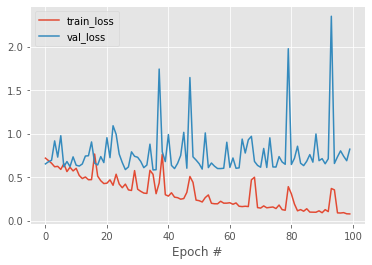

In [17]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [18]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

                    precision    recall  f1-score   support

agapornispersonata       0.78      0.58      0.67        12
  agapornistaranta       0.55      0.75      0.63         8

          accuracy                           0.65        20
         macro avg       0.66      0.67      0.65        20
      weighted avg       0.68      0.65      0.65        20



In [20]:
# uji model menggunakan image lain
queryPath = imagePaths+'/agapornispersonata/agapornispersonata1.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.14914933]]


In [22]:
if q_pred<=0.5 :
    target = "agapornispersonata"
else :
    target = "agapornistaranta"

print(target)
# text = "{}".format(target)
# cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# # menampilkan output image
# cv2.imshow('Output', output)
# cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
# cv2.destroyWindow('Output') # image akan diclose

agapornispersonata


In [24]:
model.save('lovebird.h5')